In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('../../hornsrev_data.csv')

In [3]:
dataset.head(80)

X_coord  Y_coord  Ref_Wind  Num_Turb          Sim_ID Turbine  \
0       0.0      0.0  6.112813        80  hornsrev_254_8      T1   
1      59.0   -558.0  6.112391        80  hornsrev_254_8      T2   
2     118.0  -1116.0  6.111544        80  hornsrev_254_8      T3   
3     177.0  -1674.0  6.103910        80  hornsrev_254_8      T4   
4     235.0  -2231.0  6.106692        80  hornsrev_254_8      T5   
..      ...      ...       ...       ...             ...     ...   
75   5219.0  -1674.0  5.201714        80  hornsrev_254_8     T94   
76   5278.0  -2231.0  5.189467        80  hornsrev_254_8     T95   
77   5338.0  -2789.0  5.213404        80  hornsrev_254_8     T96   
78   5397.0  -3347.0  5.508391        80  hornsrev_254_8     T97   
79   5457.0  -3904.0  6.120237        80  hornsrev_254_8     T98   

    Wind_Direction    X_rotated    Y_rotated  
0              -16     0.000000     0.000000  
1              -16   -97.091204  -552.646630  
2              -16  -194.182409 -1105.293261  
3              -16  -291.273613 -1657.939891  
4              -16  -389.050442 -2209.349622  
..             ...          ...          ...  
75             -16  4555.407857 -3047.703439  
76             -16  4458.592290 -3599.388808  
77             -16  4362.462348 -4152.311075  
78             -16  4265.371143 -4704.957706  
79             -16  4169.516838 -5256.918712  

[80 rows x 9 columns]

In [4]:
# dataset=pd.read_csv('../../hornsrev_data.csv')
# dataset['Sim_ID'] = dataset['Sim_ID'].str.replace('p00', '')
# dataset['Wind_Direction'] = dataset['Sim_ID'].apply(lambda x: x.split('_')[1]).astype(int)-270

In [5]:
# def rotate_coordinates(x, y, angle_degrees):
#     angle_radians = np.radians(angle_degrees)
#     print(angle_radians)
#     x_rotated = x * np.cos(angle_radians) - y * np.sin(angle_radians)
#     y_rotated = x * np.sin(angle_radians) + y * np.cos(angle_radians)
#     return x_rotated.astype(float), y_rotated.astype(float)

In [6]:
# # # Rotate the coordinates based on Wind_Direction
# dataset['X_rotated'], dataset['Y_rotated'] = rotate_coordinates(dataset['X_coord'], dataset['Y_coord'], dataset['Wind_Direction'])

In [7]:
# dataset=turb_data.drop(['ID','turb_num'], axis=1)

In [8]:
#dataset.to_csv('hornsrev_data.csv',index=False)

In [9]:
# dataset=dataset.tail(80)

In [10]:
dataset

X_coord  Y_coord  Ref_Wind  Num_Turb          Sim_ID Turbine  \
0         0.0      0.0  6.112813        80  hornsrev_254_8      T1   
1        59.0   -558.0  6.112391        80  hornsrev_254_8      T2   
2       118.0  -1116.0  6.111544        80  hornsrev_254_8      T3   
3       177.0  -1674.0  6.103910        80  hornsrev_254_8      T4   
4       235.0  -2231.0  6.106692        80  hornsrev_254_8      T5   
...       ...      ...       ...       ...             ...     ...   
2635   5219.0  -1674.0  5.161035        80  hornsrev_286_8     T94   
2636   5278.0  -2231.0  5.151867        80  hornsrev_286_8     T95   
2637   5338.0  -2789.0  5.178098        80  hornsrev_286_8     T96   
2638   5397.0  -3347.0  5.149983        80  hornsrev_286_8     T97   
2639   5457.0  -3904.0  5.153124        80  hornsrev_286_8     T98   

      Wind_Direction    X_rotated    Y_rotated  
0                -16     0.000000     0.000000  
1                -16   -97.091204  -552.646630  
2                -16  -194.182409 -1105.293261  
3                -16  -291.273613 -1657.939891  
4                -16  -389.050442 -2209.349622  
...              ...          ...          ...  
2635              16  5478.241725  -170.600719  
2636              16  5688.486172  -689.760880  
2637              16  5899.967518 -1209.606665  
2638              16  6110.487603 -1729.728087  
2639              16  6321.693312 -2248.612610  

[2640 rows x 9 columns]

In [11]:
import os
os.chdir("../..")
import descriptor.three_desc_model_nn as desc
from descriptor.cutoffs import Polynomial
import matplotlib.pyplot as plt
import GPy
from IPython.display import display
symbol="Siemens"
turb = [symbol]
numsims=int(2640/80)

In [12]:
def build_and_compile_model(norm, l2_reg=0.001):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse'])
    return model

In [13]:
# Gs = {"Siemens": [{"type":"G2", "turbine":"Siemens","eta":3.24310834, "offset": 1.9817547},
#                   {"type":"G4", "elements":"Siemens","eta":2.48579287, "gamma":12.39114317},
#                   {"type":"G6", "elements":"Siemens","eta":1.27537145, "gamma": 0.2110151}
#                  ]}

In [14]:
Gs = desc.make_symmetry_functions(turbines=symbol, type='G2',
                                    etas=np.linspace(1,10,5),
                                    offsets=np.linspace(1,5,5))
Gs += desc.make_symmetry_functions(turbines=symbol, type='G4',
                                     etas=np.linspace(1,10,5),
                                     gammas=np.linspace(0,10,5))
Gs += desc.make_symmetry_functions(turbines=symbol, type='G6',
                                     etas=np.linspace(1,10,5),
                                     gammas=np.linspace(0,10,5))

In [15]:
nl=desc.NeighborlistCalculator(cutoff=4001,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
finpr=desc.FingerprintCalculator(cutoff=4001,Gs=Gs,Rct=3000,delta_R=100,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
count=0
dataset_fp=np.empty(shape=(0, len(Gs)))
dataset_rws=np.empty(shape=(0, 1))
#dataset_ws=np.empty(shape=(0, 1))
dataset_pos=np.empty(shape=(0, 2))
for i in range(numsims):
    numturb=dataset["Num_Turb"].iloc[count]
    position = np.empty((numturb,2))
    rws = np.empty((numturb,1))
    #ws = np.empty((numturb,1))
    fp = np.empty((numturb,3))
    for k in range(numturb):
        position[k,0]=dataset["X_rotated"].iloc[count]
        position[k,1]=dataset["Y_rotated"].iloc[count]
        rws[k,0]=dataset["Ref_Wind"].iloc[count]
        #ws[k,0]=dataset["wind_speed"].iloc[count]
        count = count+ 1
    neigh=nl.calculate(turb*numturb,position)
    fingerprints=finpr.calculate(turb*numturb,position,neigh,symbol)
    fingerprints=np.array(fingerprints)
    dataset_fp=np.append(dataset_fp,fingerprints,axis=0)
    dataset_rws=np.append(dataset_rws,rws,axis=0)
    #dataset_ws=np.append(dataset_ws,ws,axis=0)
    dataset_pos=np.append(dataset_pos,position,axis=0)
all_data=np.concatenate((dataset_fp, dataset_rws),axis=1)
all_data = pd.DataFrame(all_data)#, columns = ['Fingerprint(G2)','Fingerprint(G4)','Fingerprint(G6)','Ref_Wind_Speed','Wind_Speed'])

train_data = all_data.sample(frac=0.8, random_state=0)
test_data = all_data.drop(train_data.index)

X_train = train_data.iloc[:,:-1]
X_test = test_data.iloc[:,:-1]
X = all_data.iloc[:,:-1]

Y_train = train_data.iloc[:,-1]
Y_test = test_data.iloc[:,-1]
Y = all_data.iloc[:,-1]

In [16]:
X_train.isnull().sum().sum()

0

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers, callbacks, regularizers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [18]:


def train_model(model, X_train, y_train, X_val, y_val, batch_size=32):
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=100, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10000, callbacks=[early_stopping], batch_size=batch_size)

    return history

In [19]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 75)                151       
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                4864      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [20]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
history = train_model(dnn_model, x_train,y_train, x_val, y_val, batch_size=32)

Epoch 1/10000
60/60 [==============================] - 0s 2ms/step - loss: 4.7013 - mse: 20.9863 - val_loss: 3.7180 - val_mse: 13.0431
Epoch 2/10000
60/60 [==============================] - 0s 1ms/step - loss: 2.4136 - mse: 6.6635 - val_loss: 1.5078 - val_mse: 2.6733
Epoch 3/10000
60/60 [==============================] - 0s 861us/step - loss: 1.1912 - mse: 2.0711 - val_loss: 0.8938 - val_mse: 1.0336
Epoch 4/10000
60/60 [==============================] - 0s 829us/step - loss: 0.8267 - mse: 1.0936 - val_loss: 0.6428 - val_mse: 0.5289
Epoch 5/10000
60/60 [==============================] - 0s 847us/step - loss: 0.6395 - mse: 0.6486 - val_loss: 0.5080 - val_mse: 0.2823
Epoch 6/10000
60/60 [==============================] - 0s 830us/step - loss: 0.5152 - mse: 0.4019 - val_loss: 0.4157 - val_mse: 0.1568
Epoch 7/10000
60/60 [==============================] - 0s 937us/step - loss: 0.4301 - mse: 0.2479 - val_loss: 0.3772 - val_mse: 0.1038
Epoch 8/10000
60/60 [==============================] - 0s

In [21]:
def plot_loss(history):
    plt.figure(dpi=1200)
    plt.plot(history.history['loss'], label='train_error', color='C0')
    plt.plot(history.history['val_loss'], label='validation_error', color='C1')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Absolute Error [m/s]')
    plt.legend()
    
    plt.grid(True)

In [22]:
def plot_loss_mse(history):
    plt.plot(history.history['mse'], label='train_mse', color='C0')
    plt.plot(history.history['val_mse'], label='validation_mse', color='C1')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Absolute Error [m/s]')
    plt.legend()
    plt.figure(dpi=1200)
    plt.grid(True)

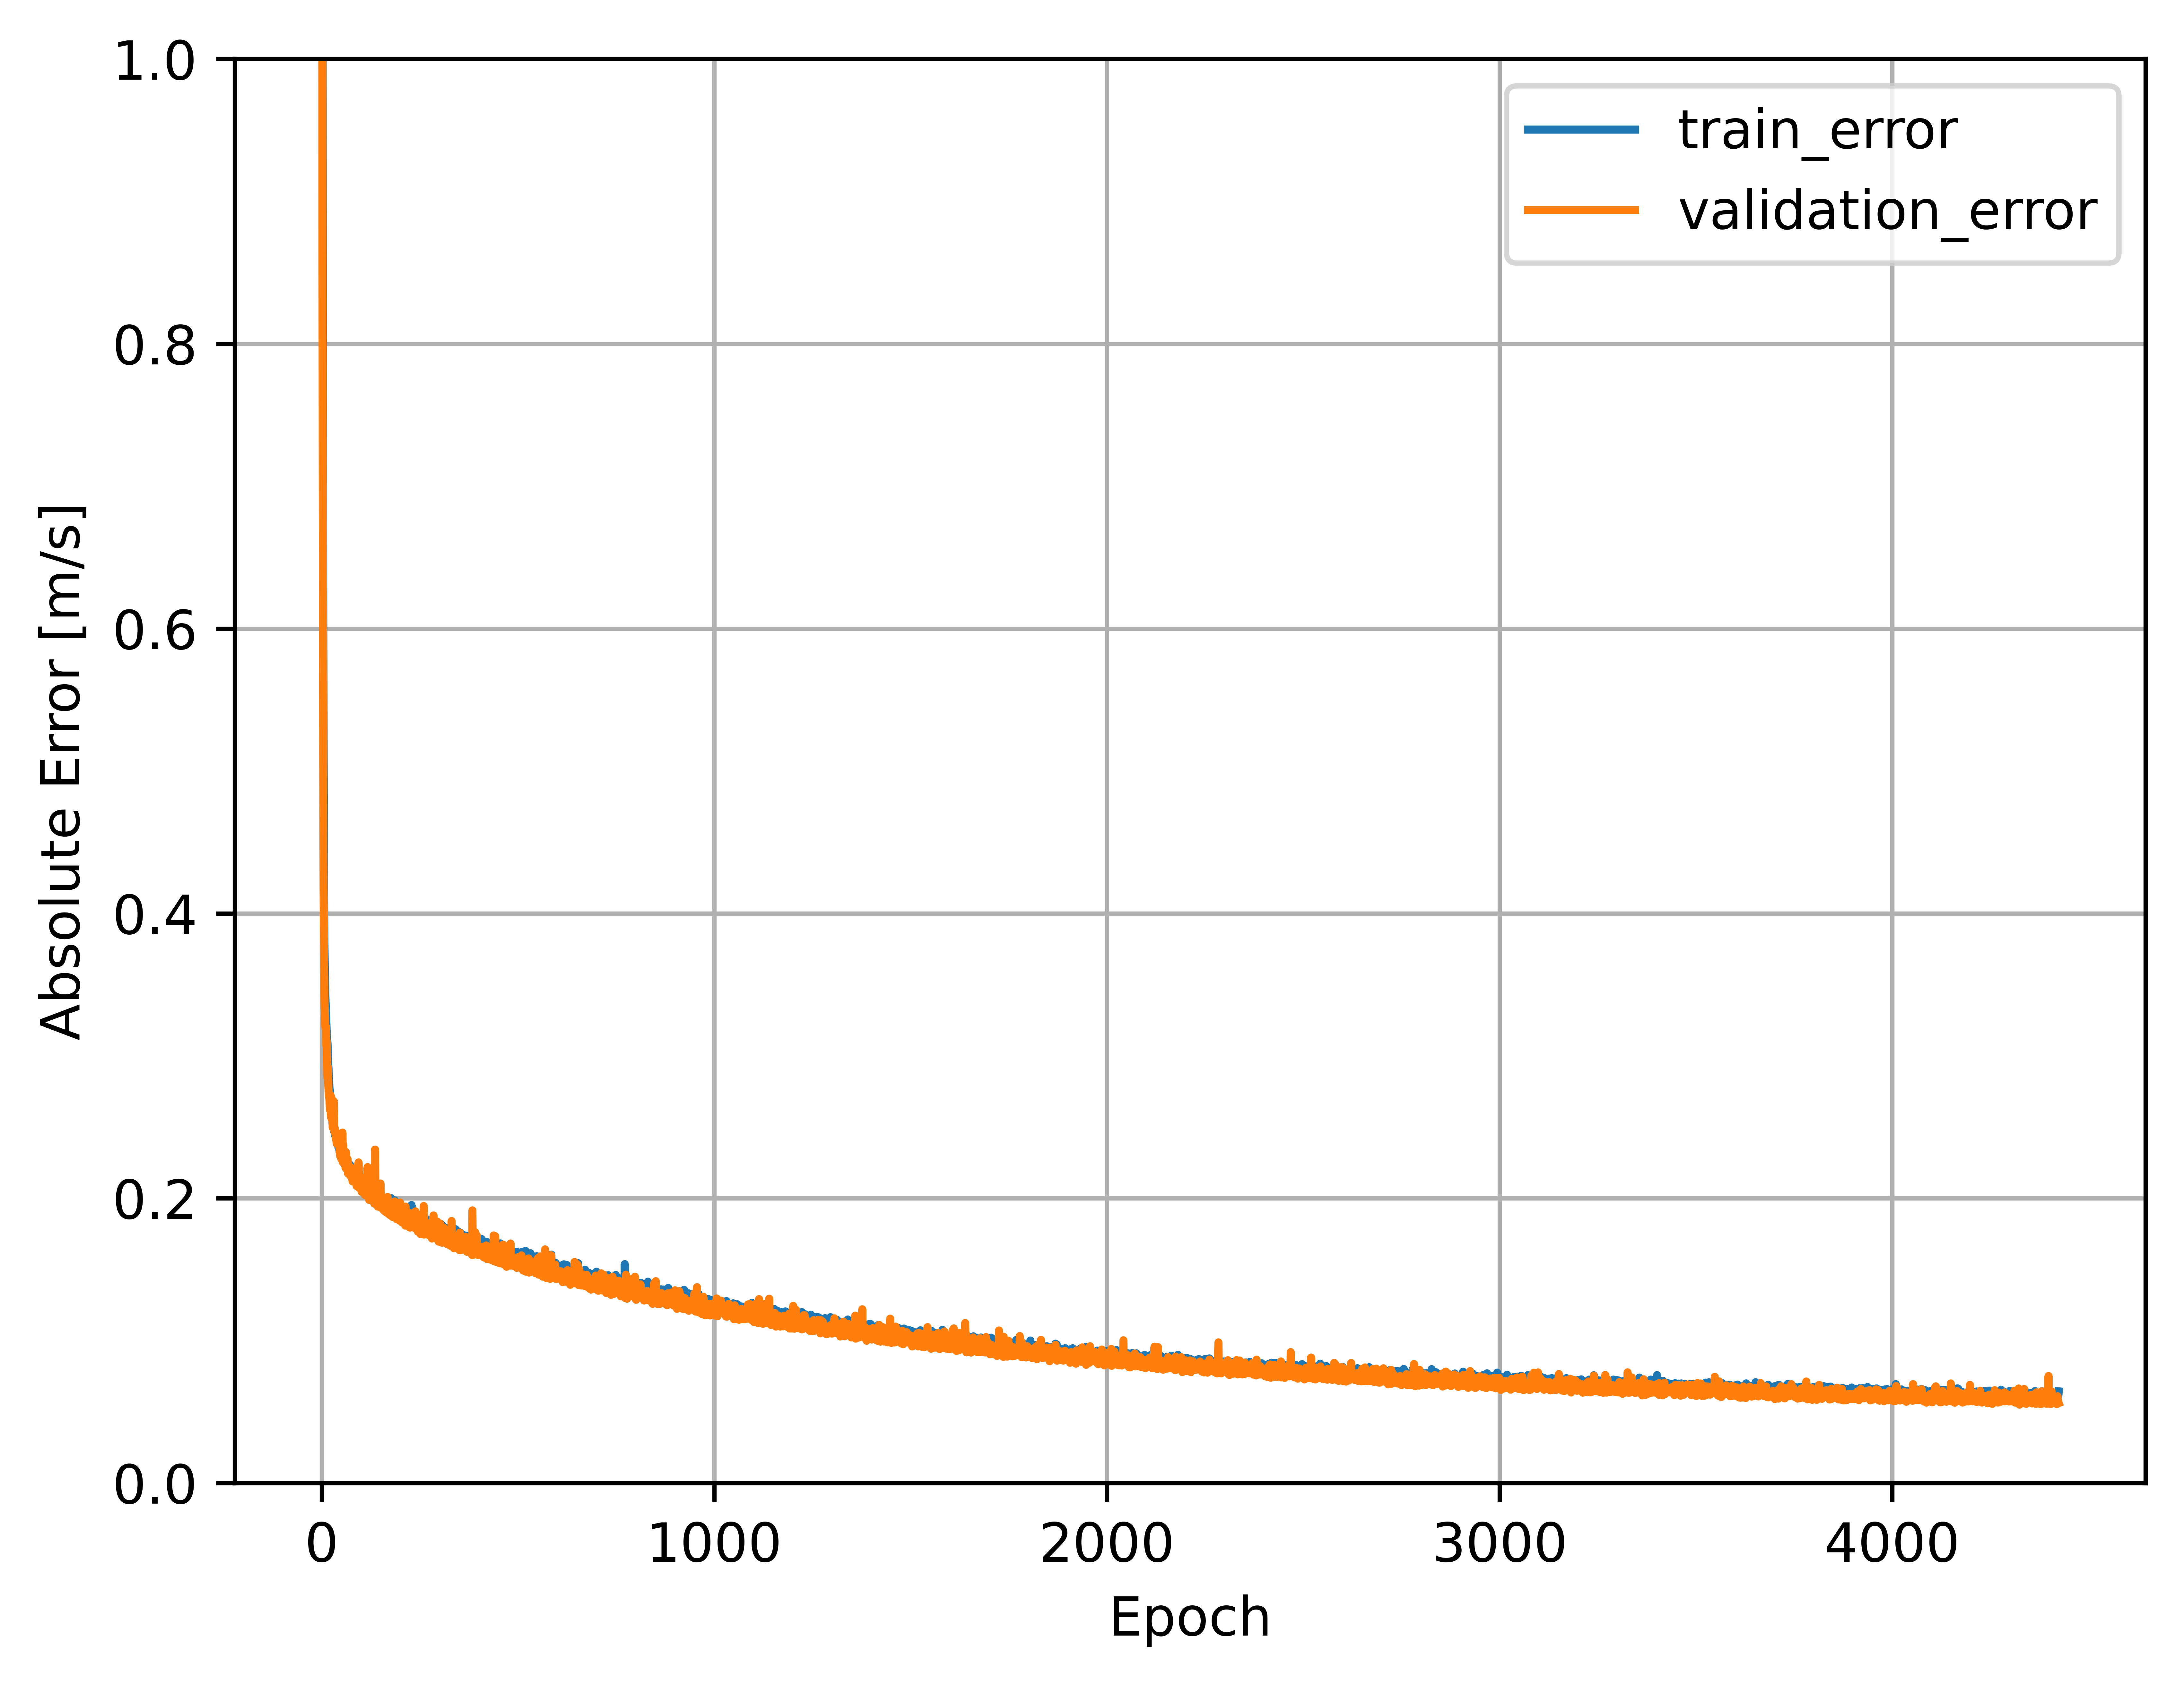

In [23]:
plot_loss(history)

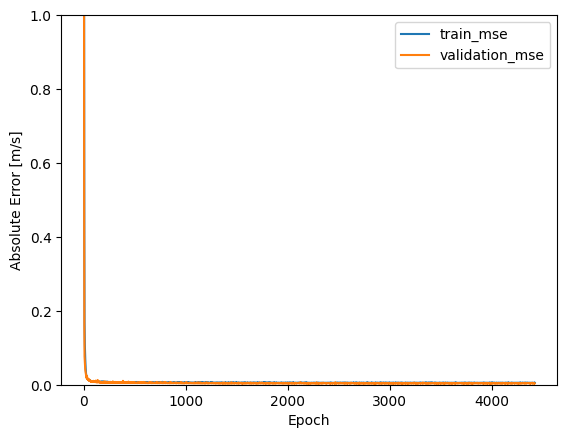

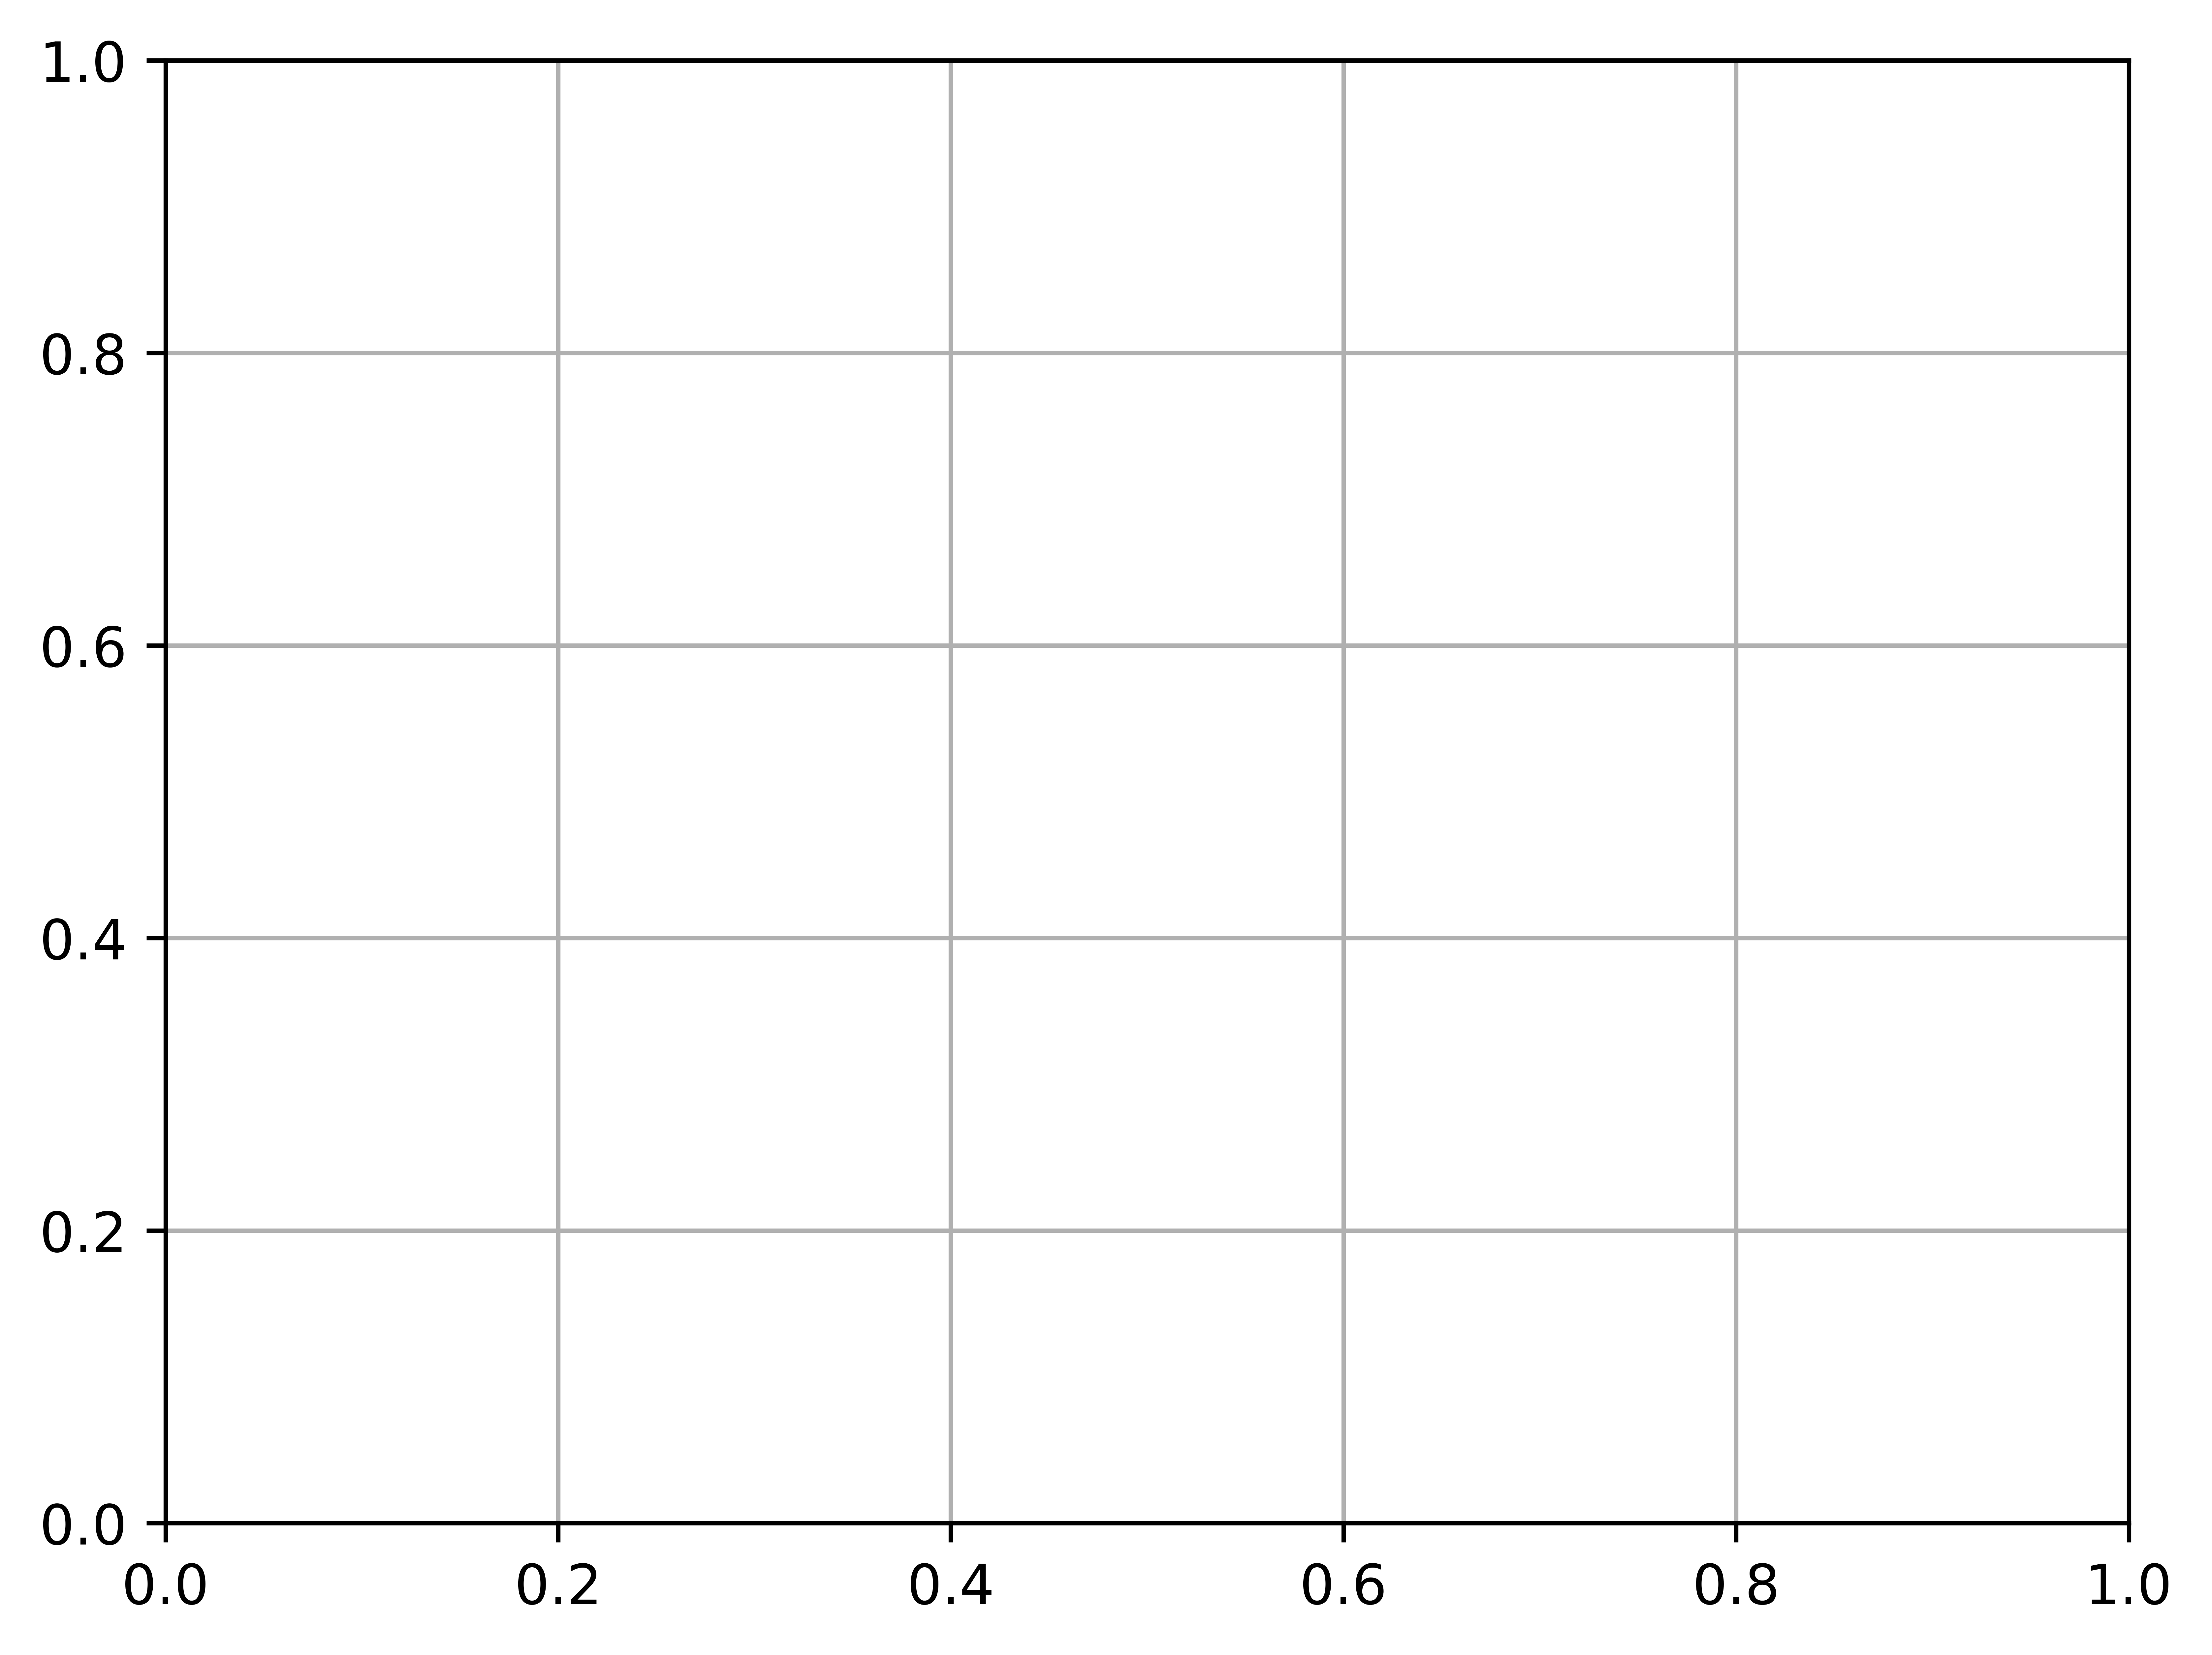

In [24]:
plot_loss_mse(history)

In [25]:
list(set(X.iloc[:,-1]))

[0.9684720727542526,
 1.0,
 0.9998672219315097,
 0.9802819698571845,
 0.8964223569710157,
 0.9979050019152602,
 0.9723129831616433,
 0.31565940317472396,
 0.3152248852182389,
 0.3119662611421212,
 0.9757357588660727,
 0.976608669854919,
 0.9722253217272411,
 0.9119749681317345,
 0.9840012208364798,
 0.8879187323148878,
 0.8884086282172072,
 0.44999739449636406,
 0.31607081102375295,
 0.32440211301223704,
 0.33141279358422443,
 0.3192746114380896,
 0.44920168044825465,
 0.3132572656762776,
 0.37288173851229806,
 0.31578087161716617,
 0.31196335061839525,
 0.31540026854302644,
 0.9968494384689297,
 0.40482662517893825,
 0.8878024942477428,
 0.6601196742912263,
 0.672666565054473,
 0.39911460371184543,
 0.8877859320363475,
 0.9675961124678844,
 0.9721391157403155,
 0.3811520496819406,
 0.3271985260425191,
 0.316647764741287,
 0.31619240133626303,
 0.9675864797558554,
 0.9810335015097317,
 0.9745897179657598,
 0.9722807594931419,
 0.9979696056865386,
 0.9771079774288017,
 0.978241833592517

83/83 [==============================] - 0s 307us/step


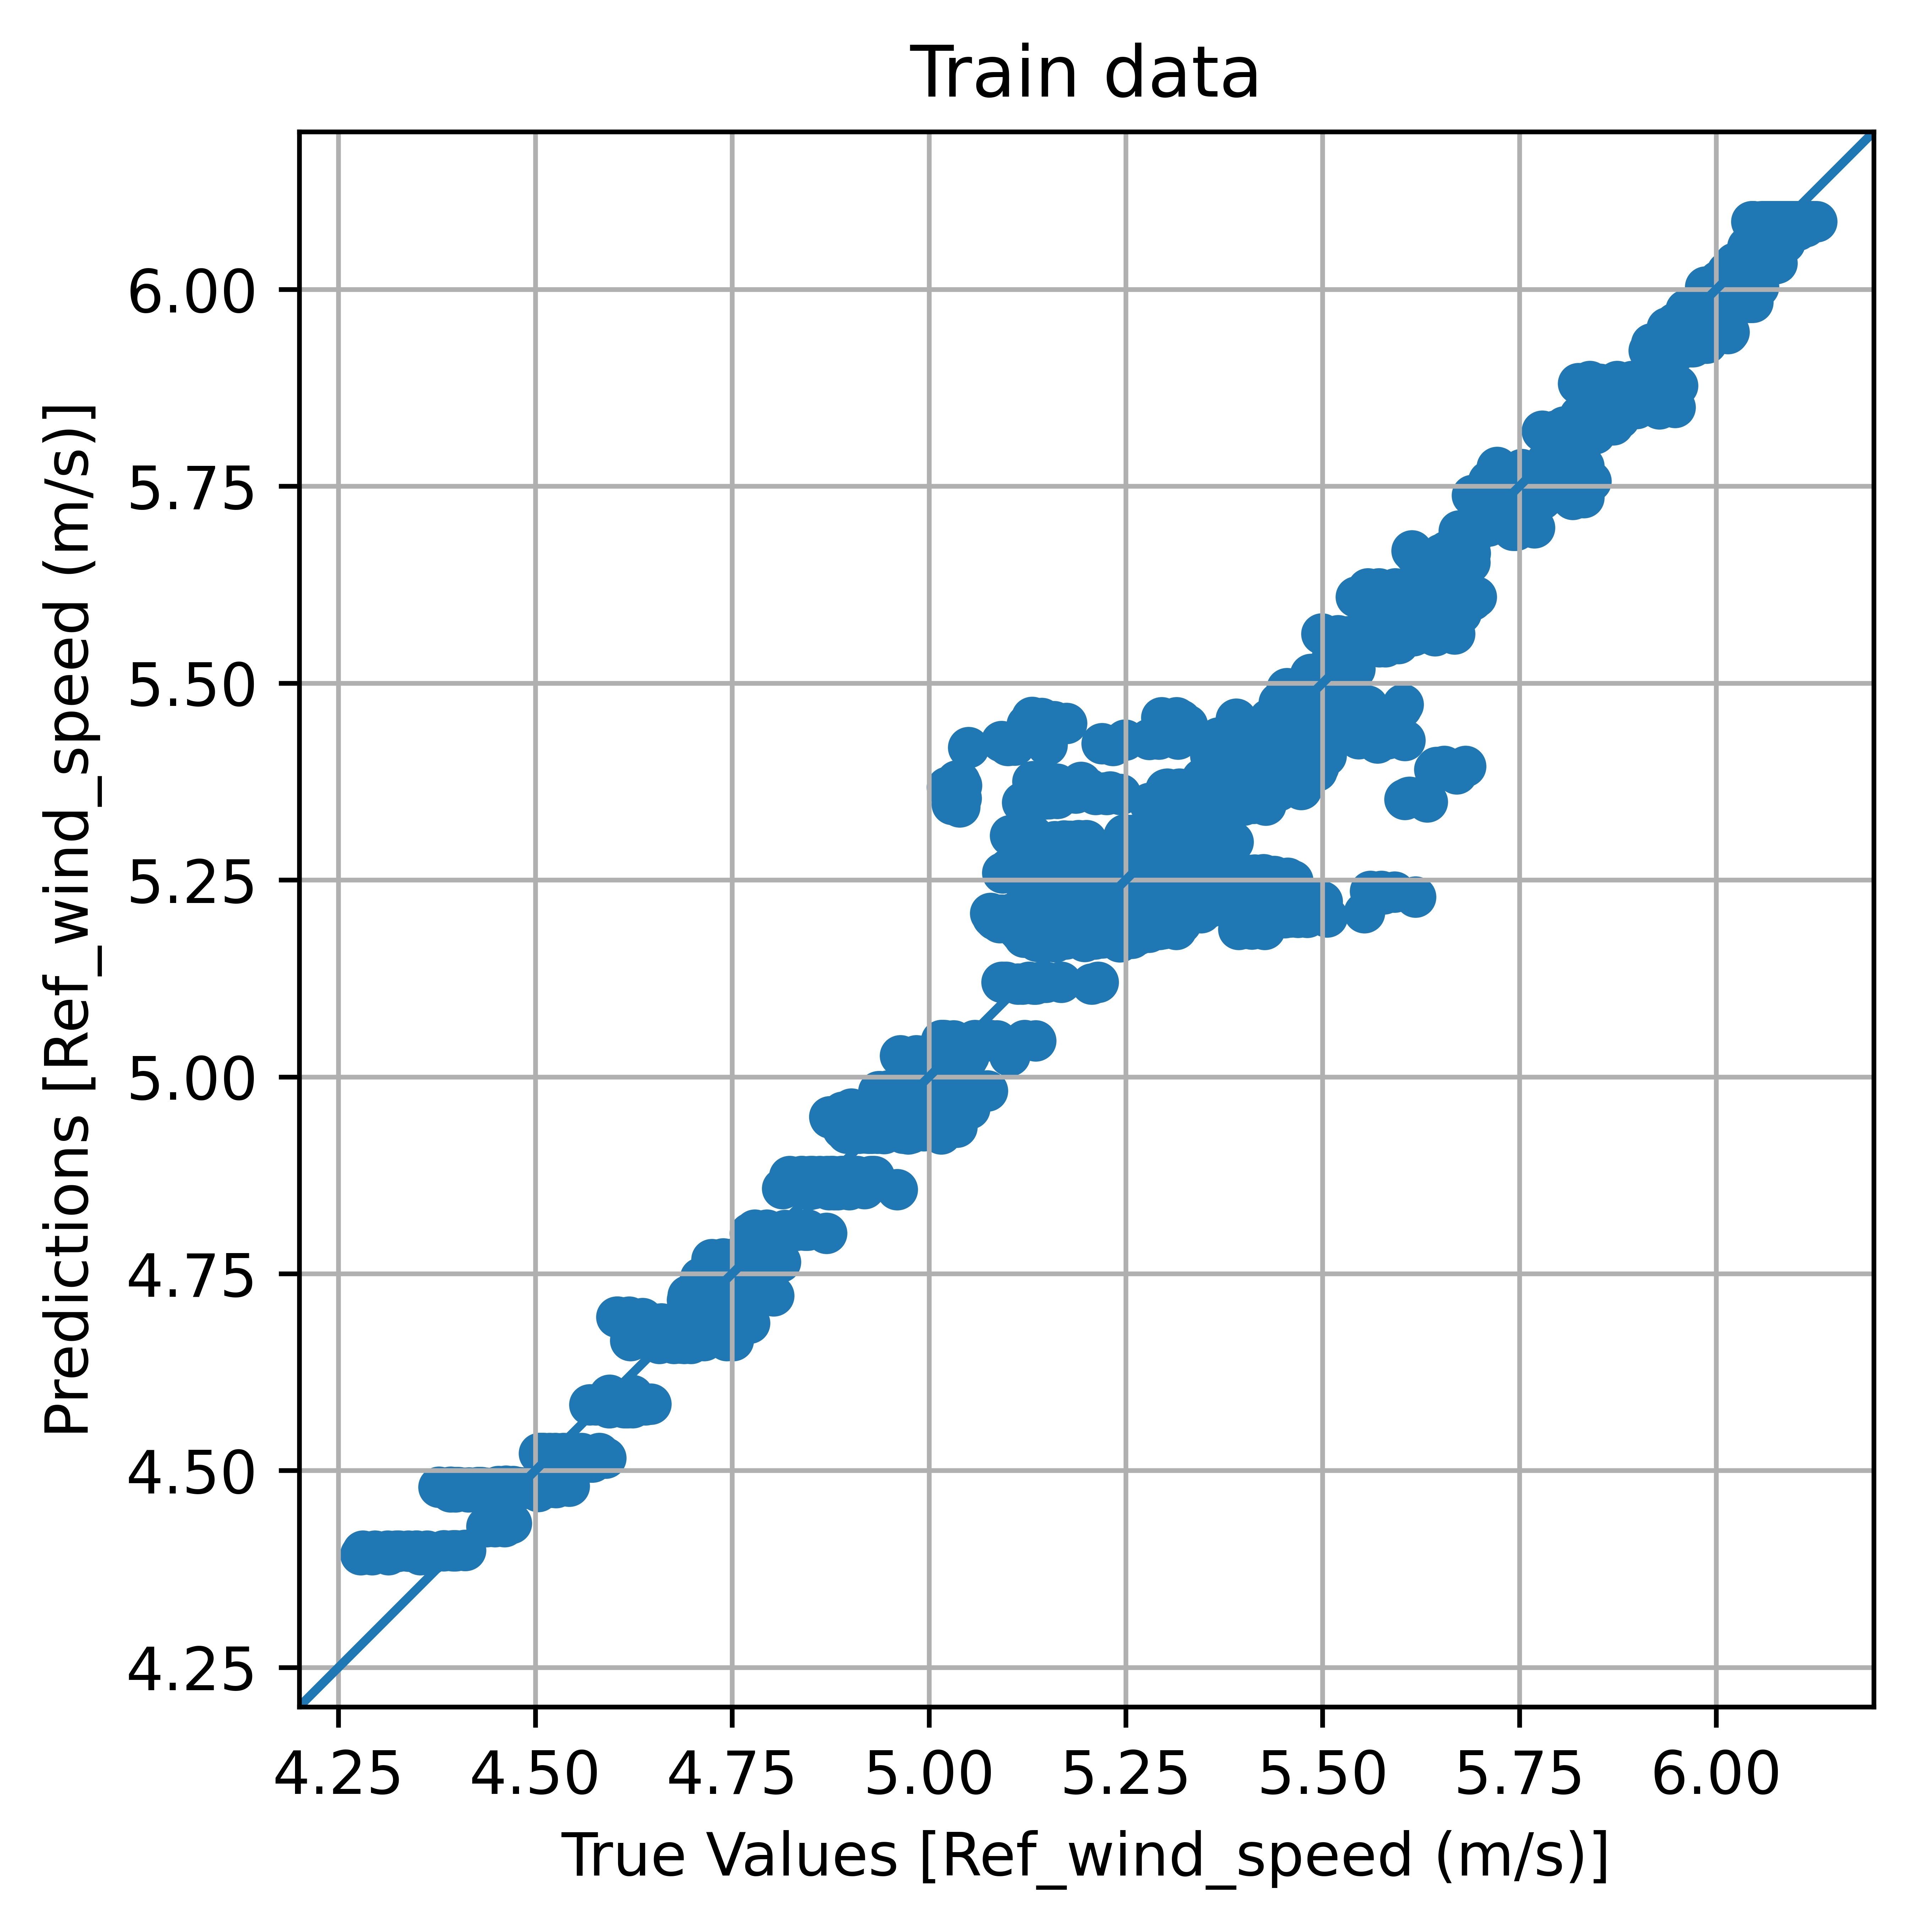

In [39]:
test_predictions = dnn_model.predict(X_test).flatten()
train_predictions = dnn_model.predict(X_train).flatten()
all_predictions = dnn_model.predict(X).flatten()
#test_predictions_0 = dnn_model.predict(test_features["Fingerprint(G2)"]==0).flatten()
#train_predictions_0 = dnn_model.predict(train_features["Fingerprint(G2)"]==0).flatten()
plt.figure(dpi=1200)

a = plt.axes(aspect='equal')
#plt.scatter(test_labels, test_predictions)#,c=test_features["Fingerprint(G2)"])
#plt.scatter(train_labels, train_predictions)#,c=train_features["Fingerprint(G2)"])
plt.scatter(Y_train, train_predictions)
plt.xlabel('True Values [Ref_wind_speed (m/s)]')
plt.ylabel('Predictions [Ref_wind_speed (m/s)]')
plt.title('Train data')
#cbar=plt.colorbar()
#cbar.set_label('Fingerprint(G2)')
lims = [4.2, 6.2]
plt.xlim(lims)
plt.ylim(lims)
plt.grid(True)
#plt.xticks([5.0, 6.0, 7.0])
#plt.yticks([5.0, 6.0, 7.0])
_ = plt.plot(lims, lims)

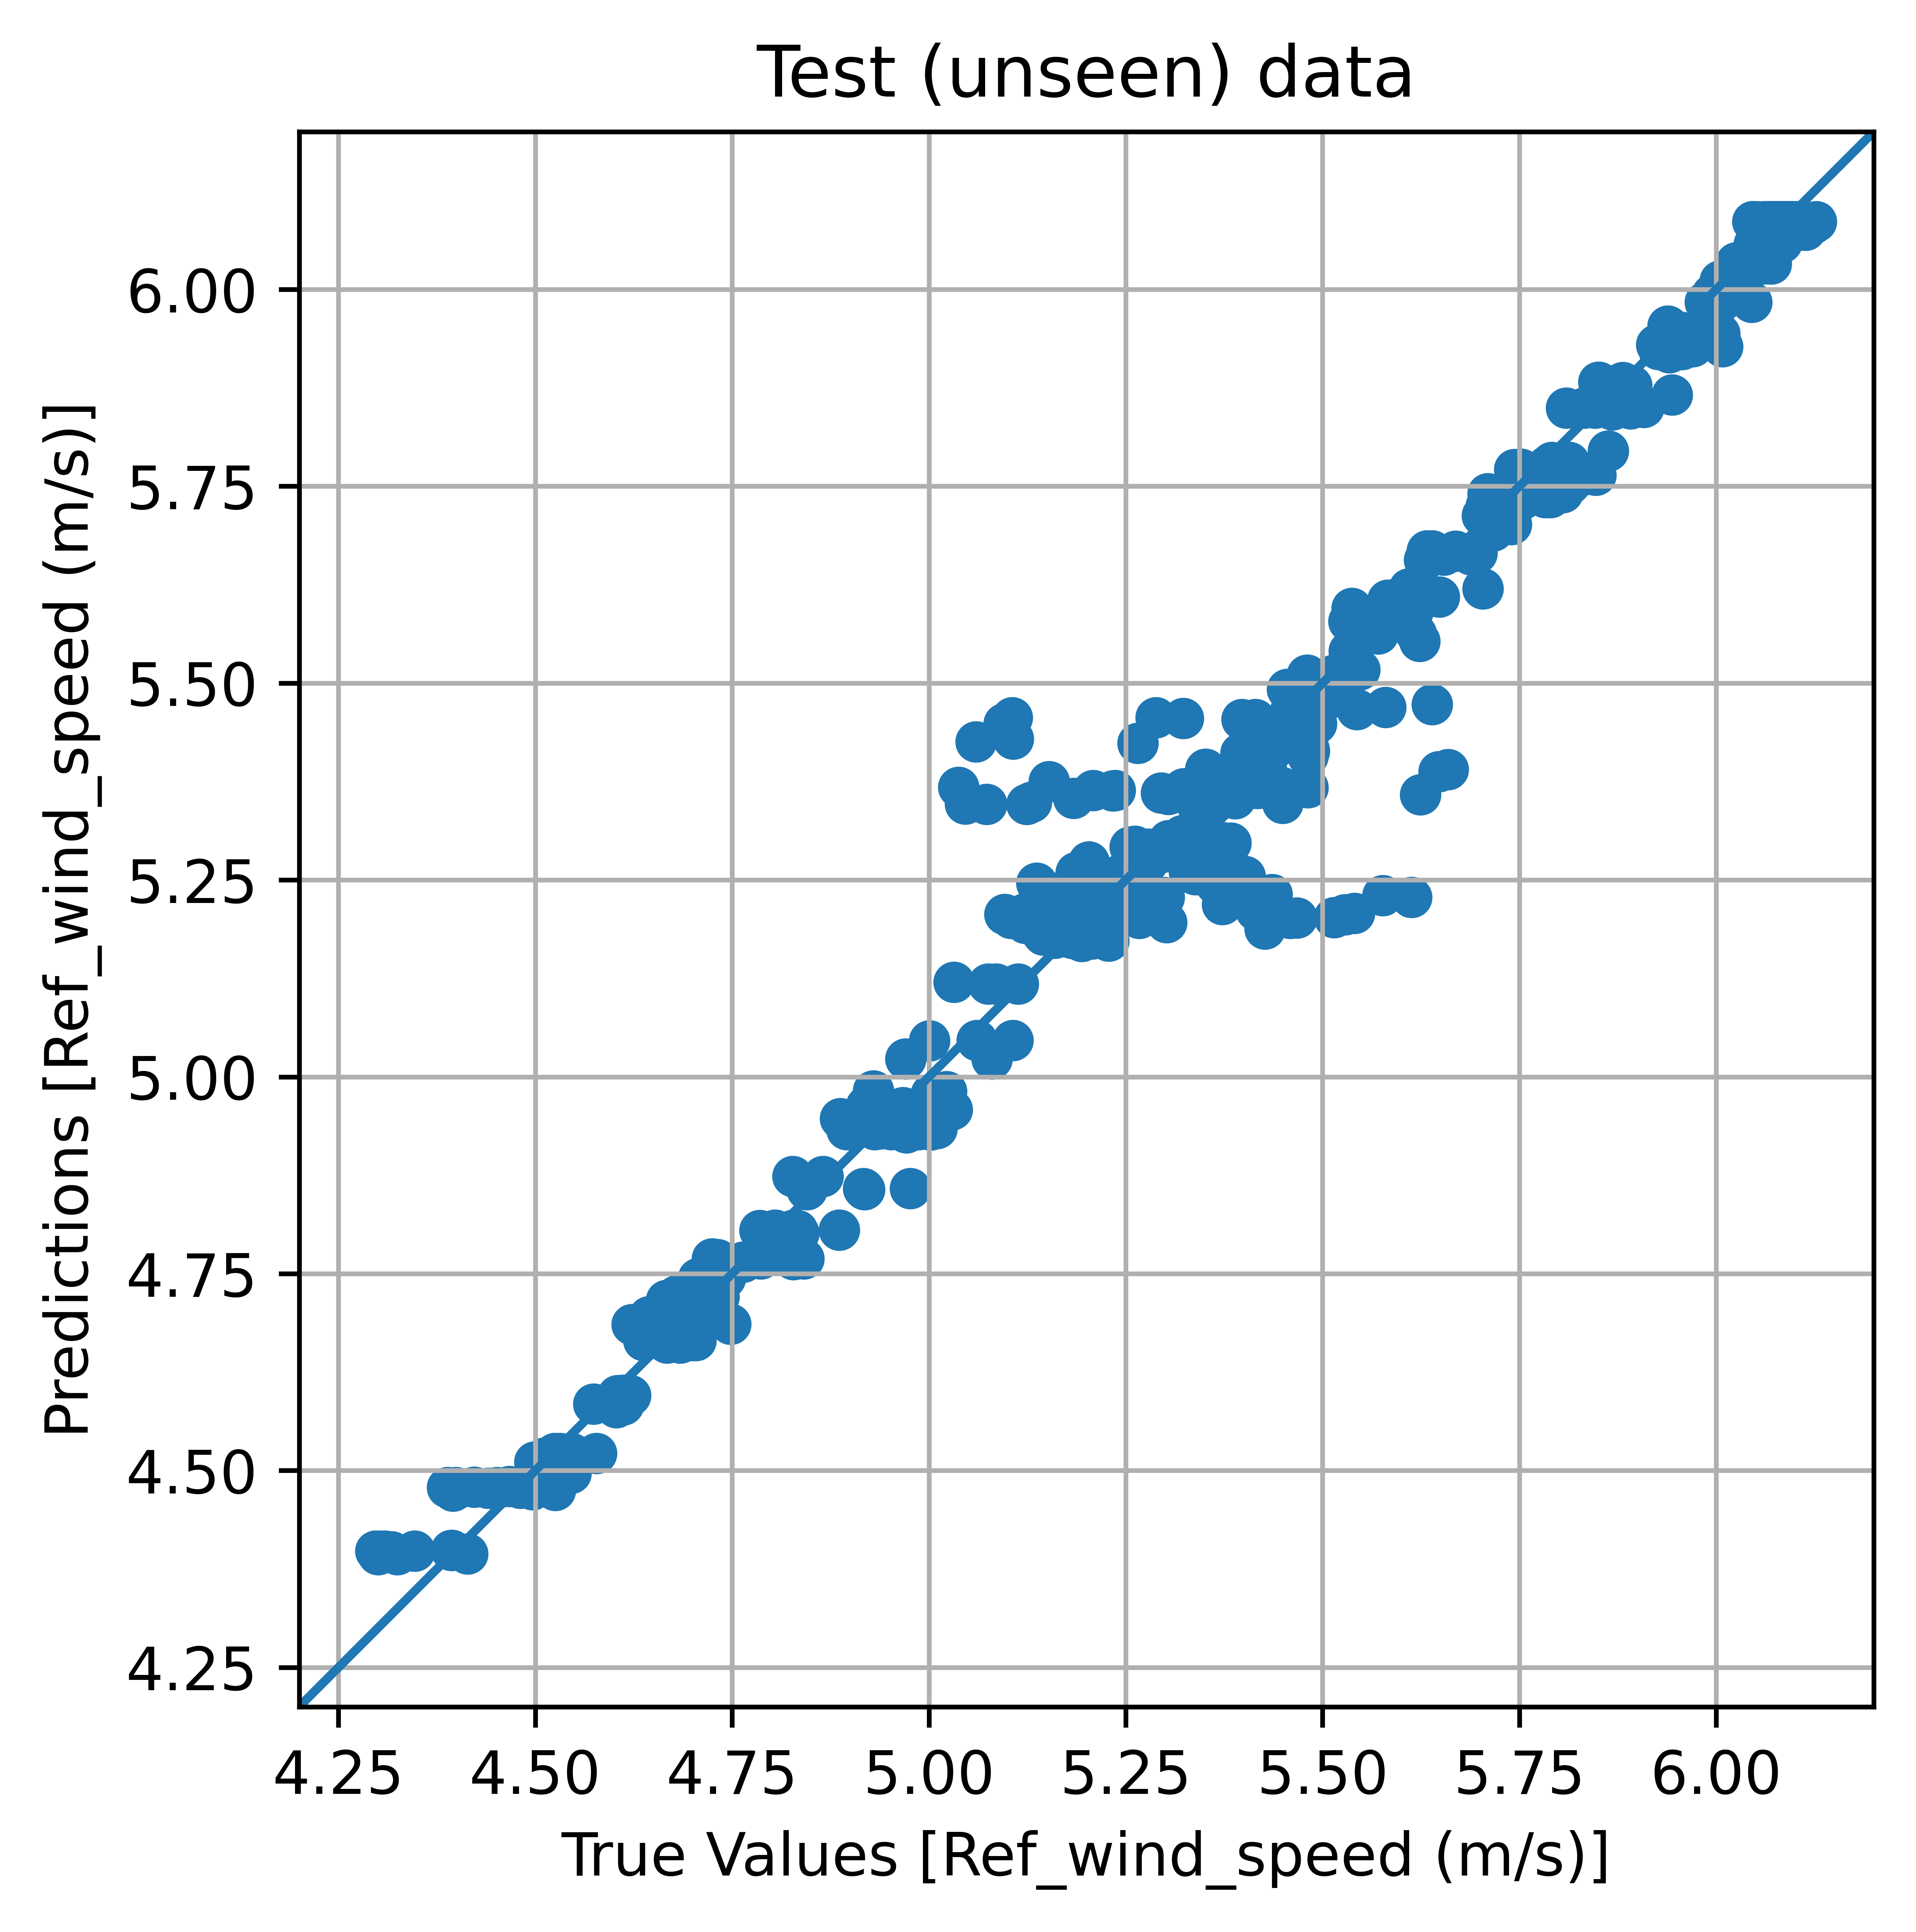

In [38]:
plt.figure(dpi=1200)
a = plt.axes(aspect='equal')
#plt.scatter(test_labels, test_predictions)#,c=test_features["Fingerprint(G2)"])
#plt.scatter(train_labels, train_predictions)#,c=train_features["Fingerprint(G2)"])
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [Ref_wind_speed (m/s)]')
plt.ylabel('Predictions [Ref_wind_speed (m/s)]')
plt.title('Test (unseen) data')
#cbar=plt.colorbar()
#cbar.set_label('Fingerprint(G2)')
lims = [4.2, 6.2]
plt.xlim(lims)
plt.ylim(lims)
plt.grid(True)
#plt.xticks([5.0, 6.0, 7.0])
#plt.yticks([5.0, 6.0, 7.0])
_ = plt.plot(lims, lims)

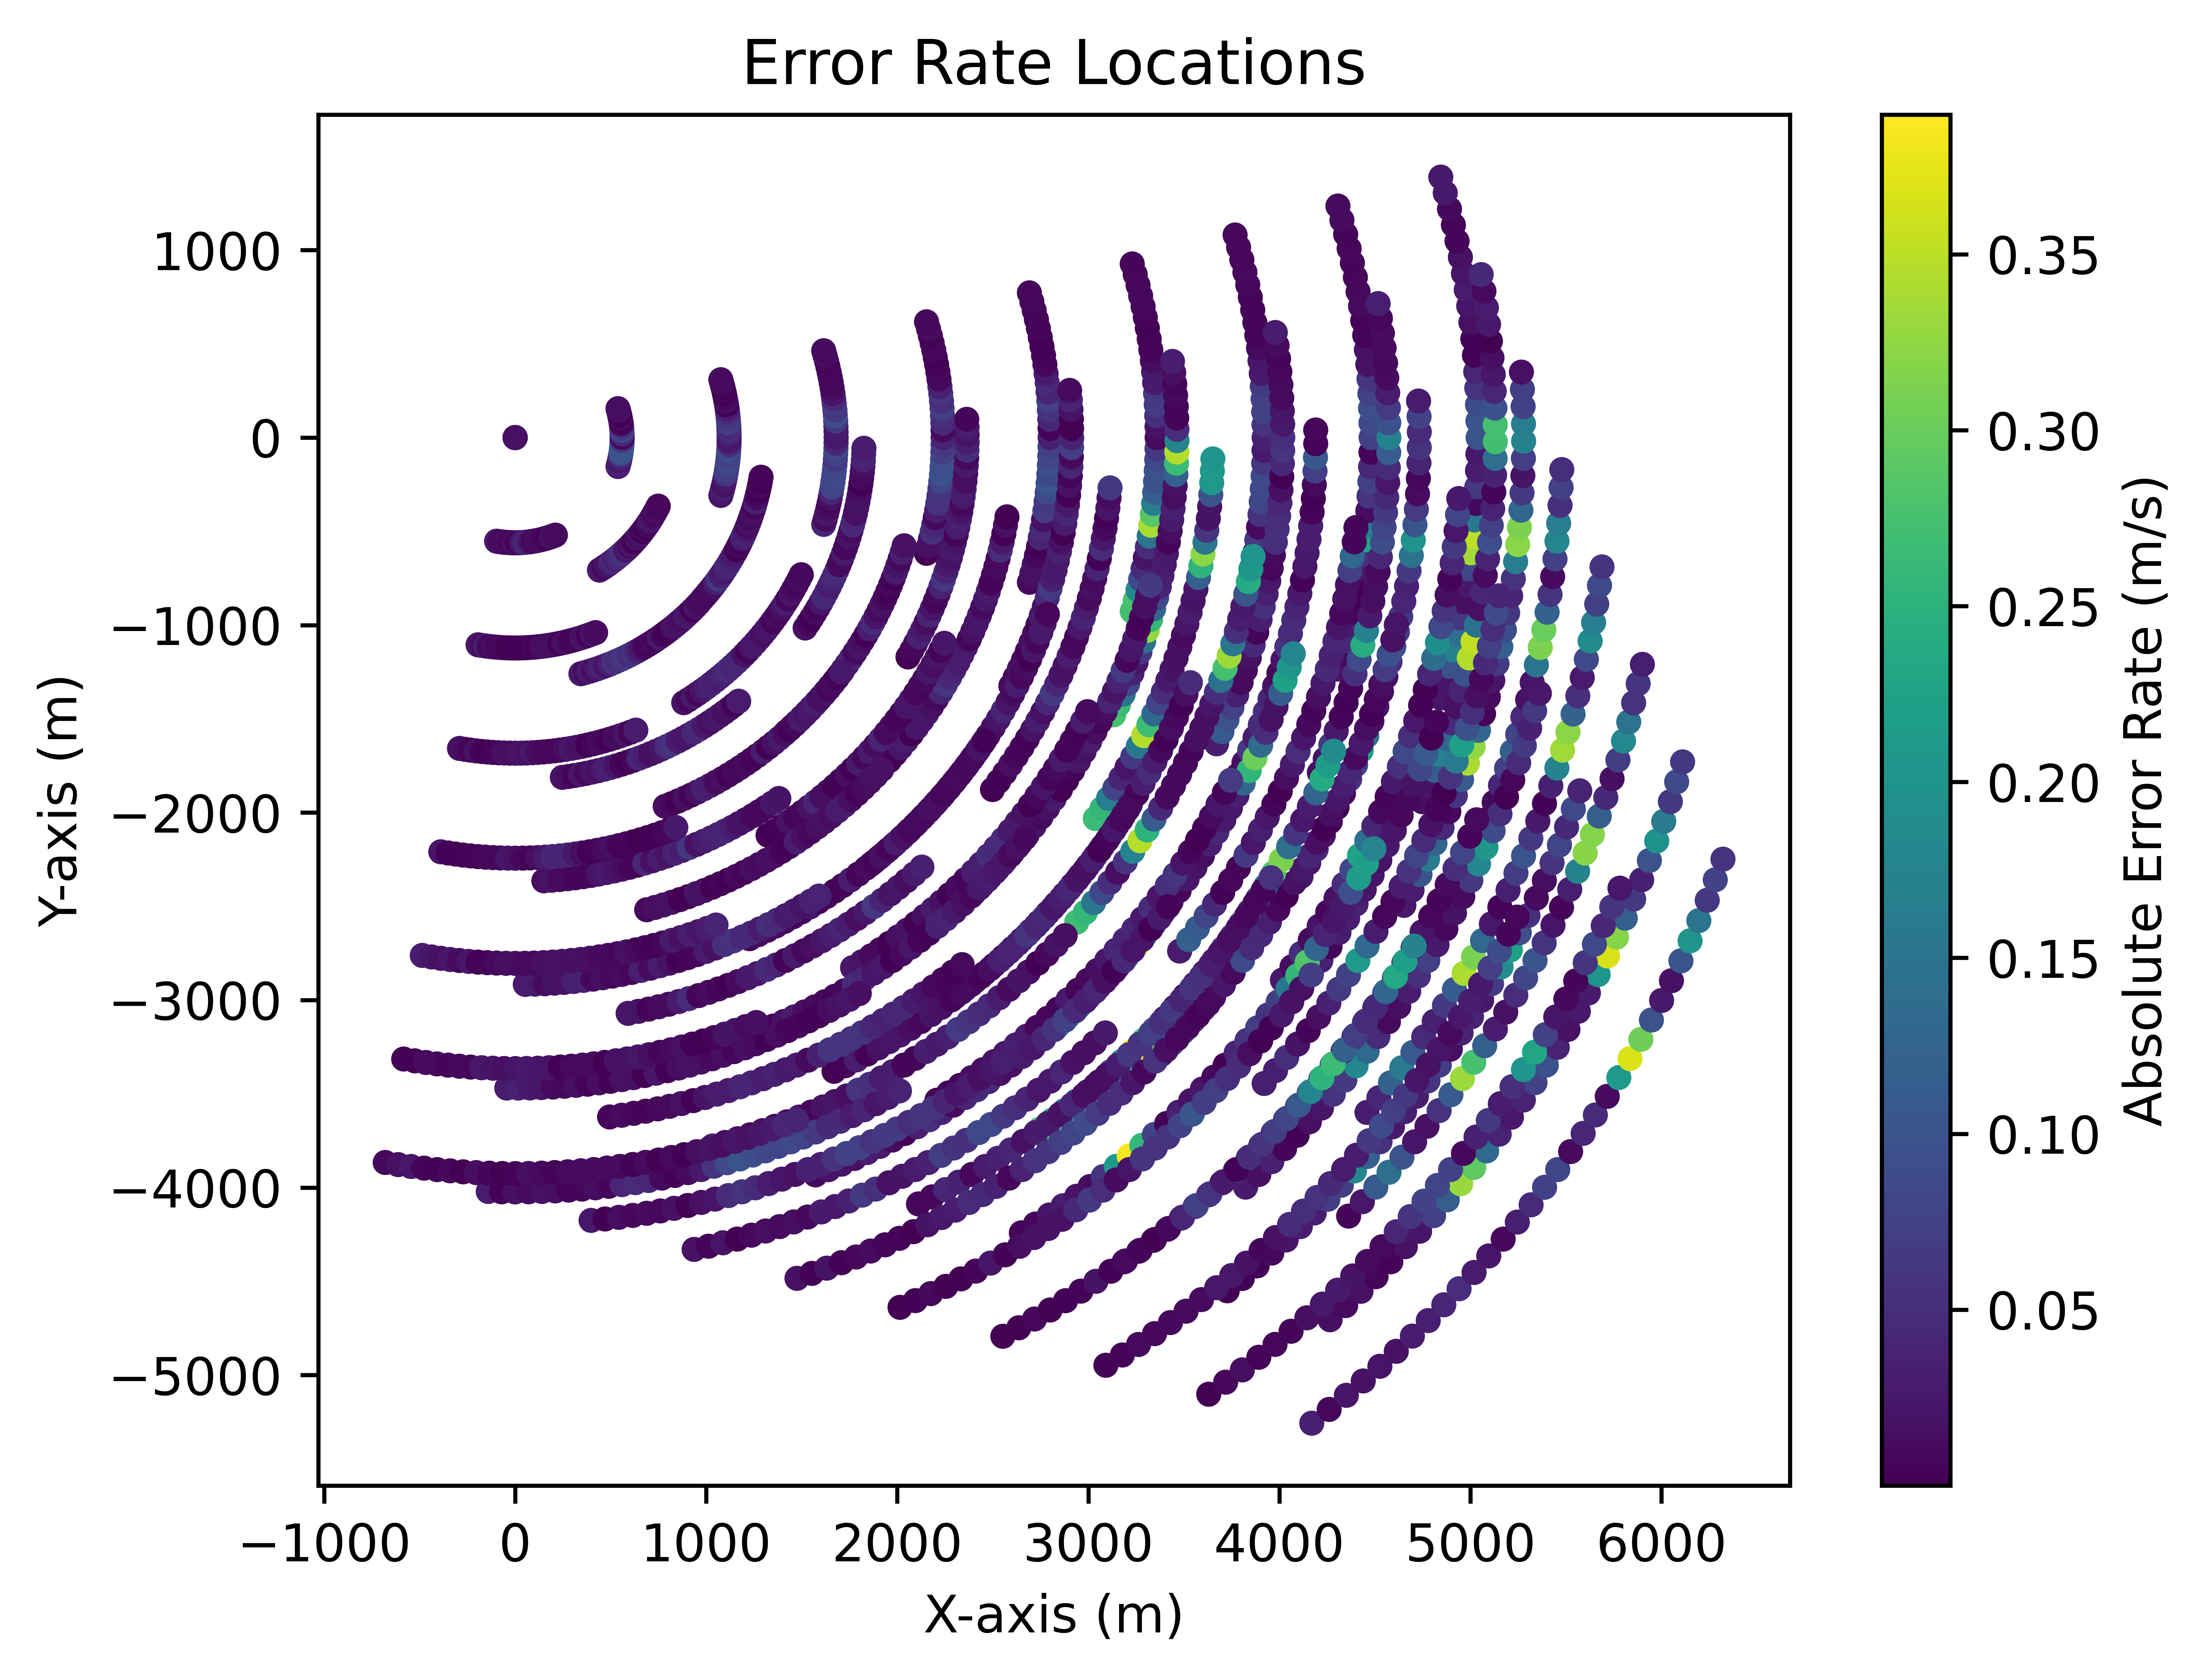

In [28]:
#all_predictions = dnn_model.predict(X).flatten()
a = plt.axes
error_all=np.abs(all_predictions-Y)
plt.figure(dpi=1200)
plt.scatter(dataset_pos[:,0], dataset_pos[:,1],c=error_all, cmap='viridis', s=15)
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=train_labels)
#plt.scatter(train_labels, train_predictions)
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.title('Error Rate Locations')
cbar=plt.colorbar()
cbar.set_label('Absolute Error Rate (m/s)')

Text(0.5, 1.0, 'Horns Rev 1 Layout')

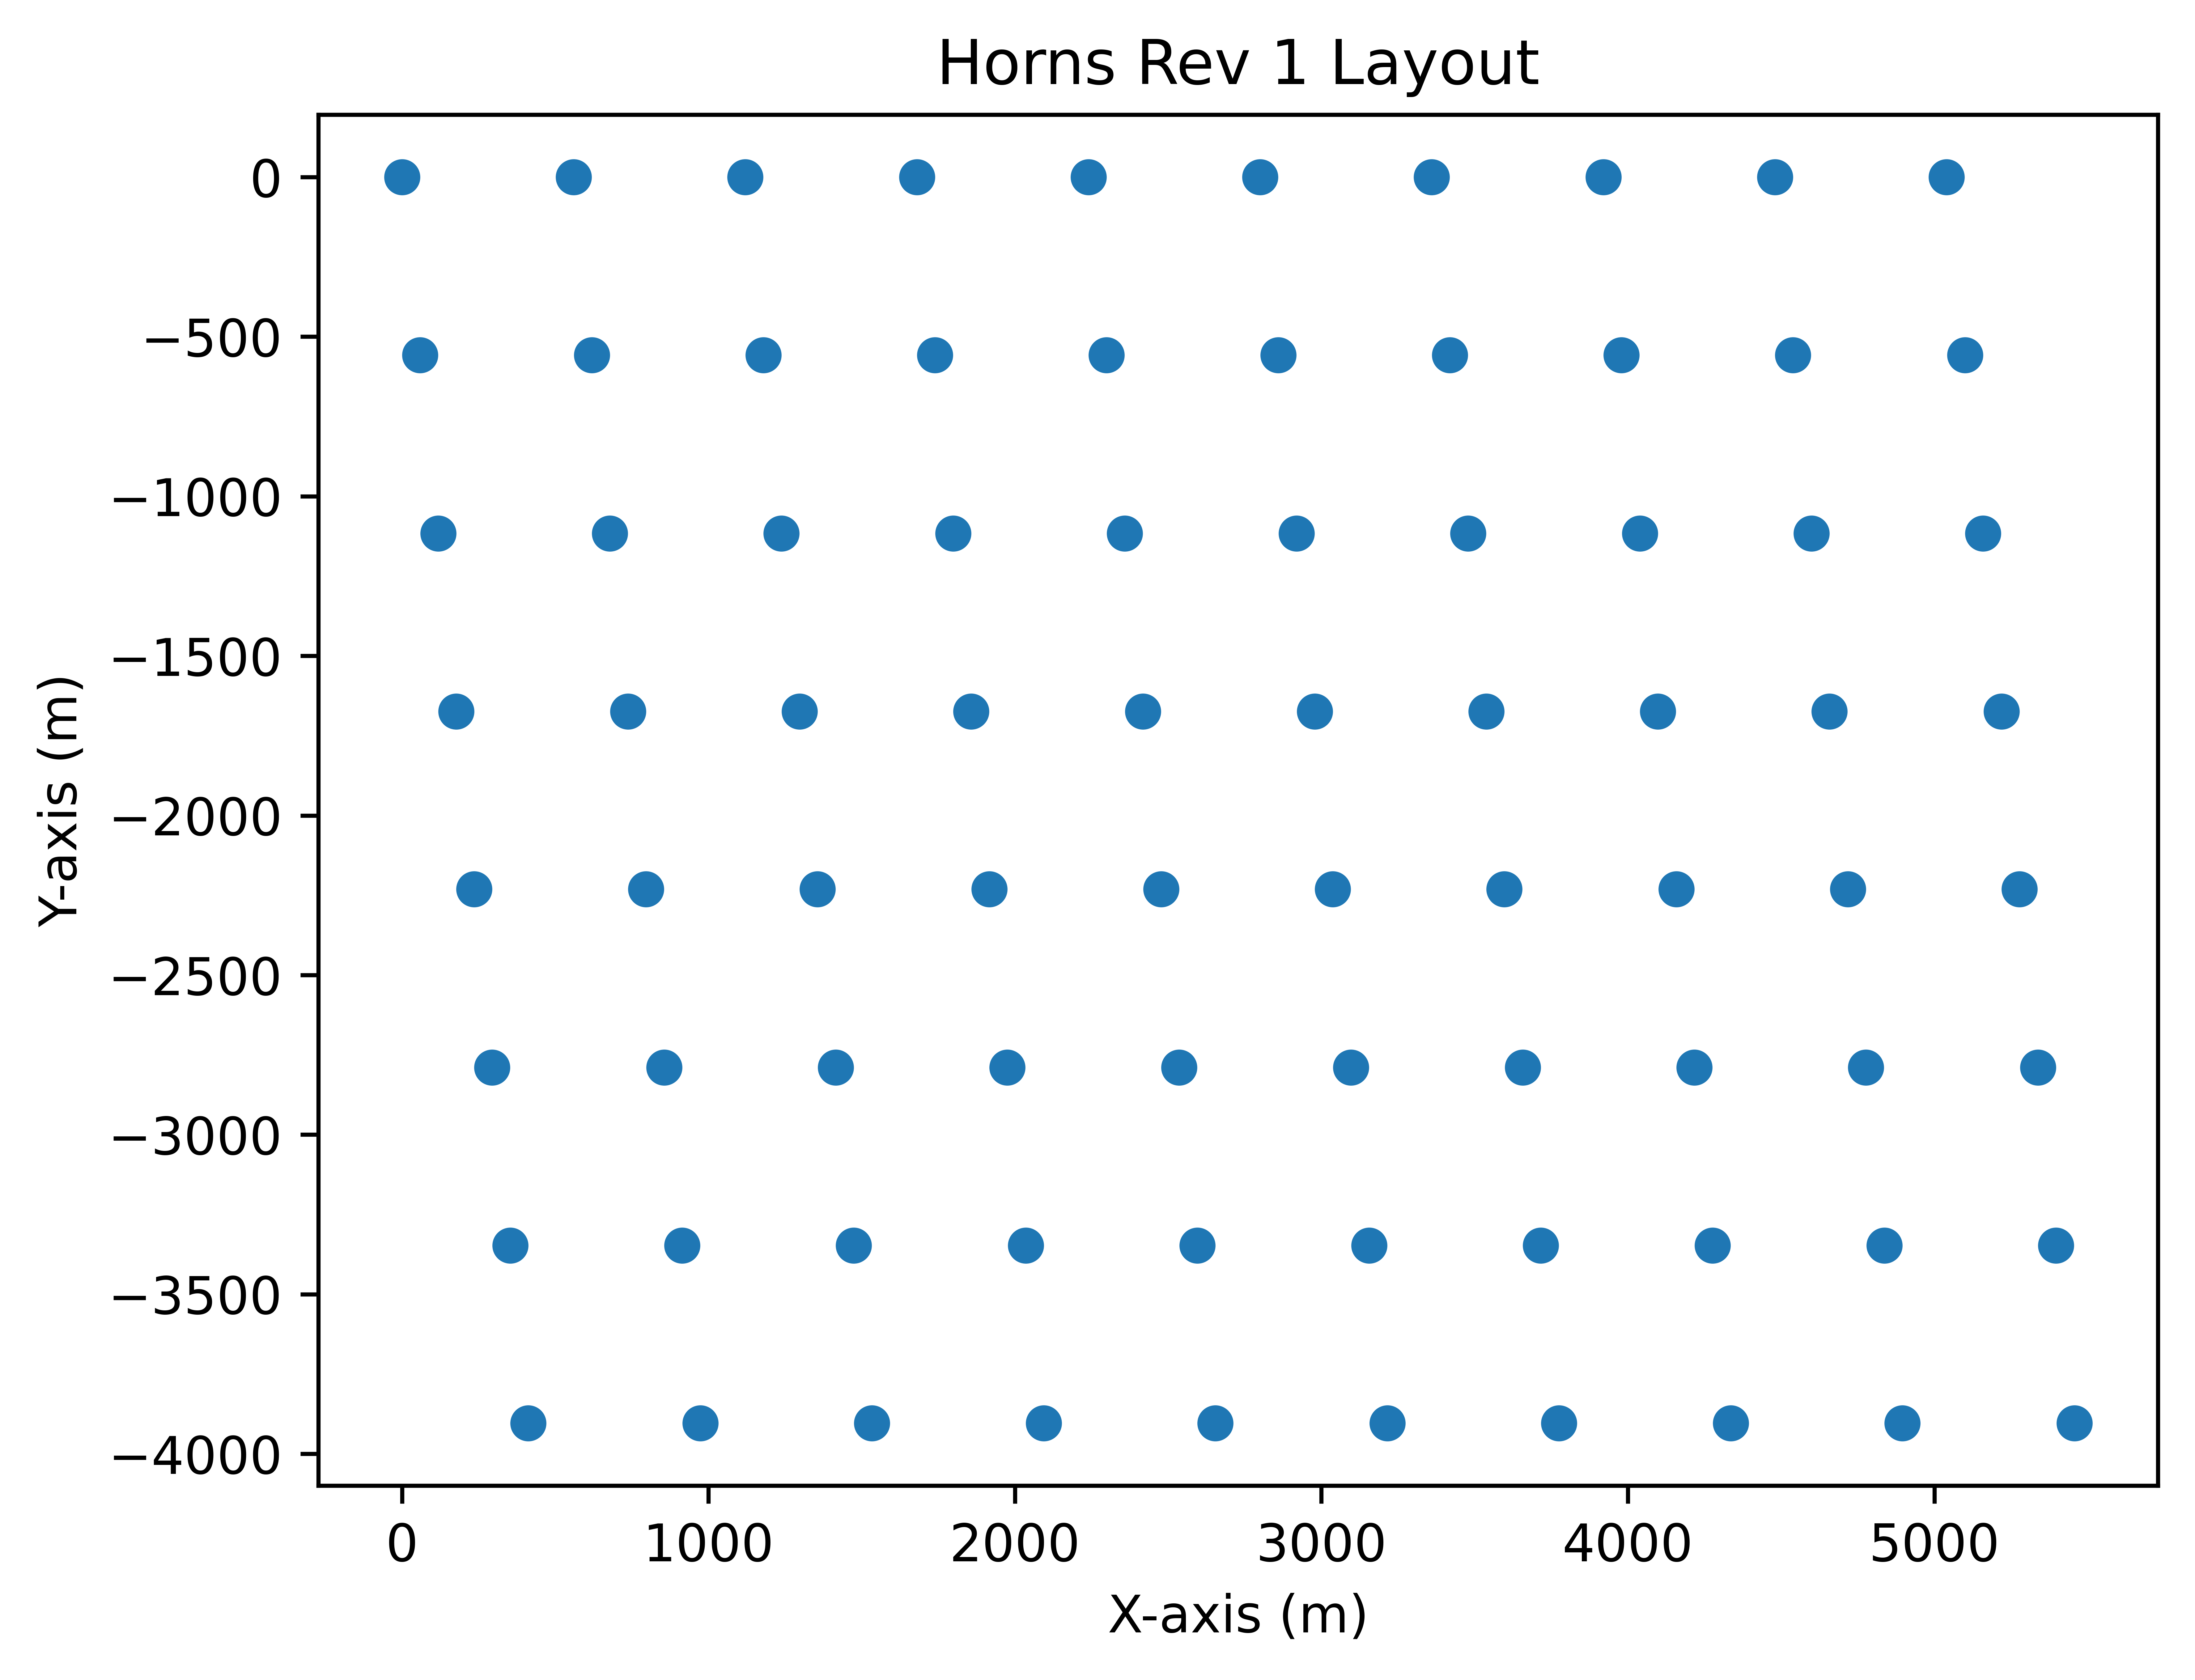

In [29]:
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
plt.scatter(dataset.head(80)['X_coord'], dataset.head(80)['Y_coord'])

plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.title('Horns Rev 1 Layout')


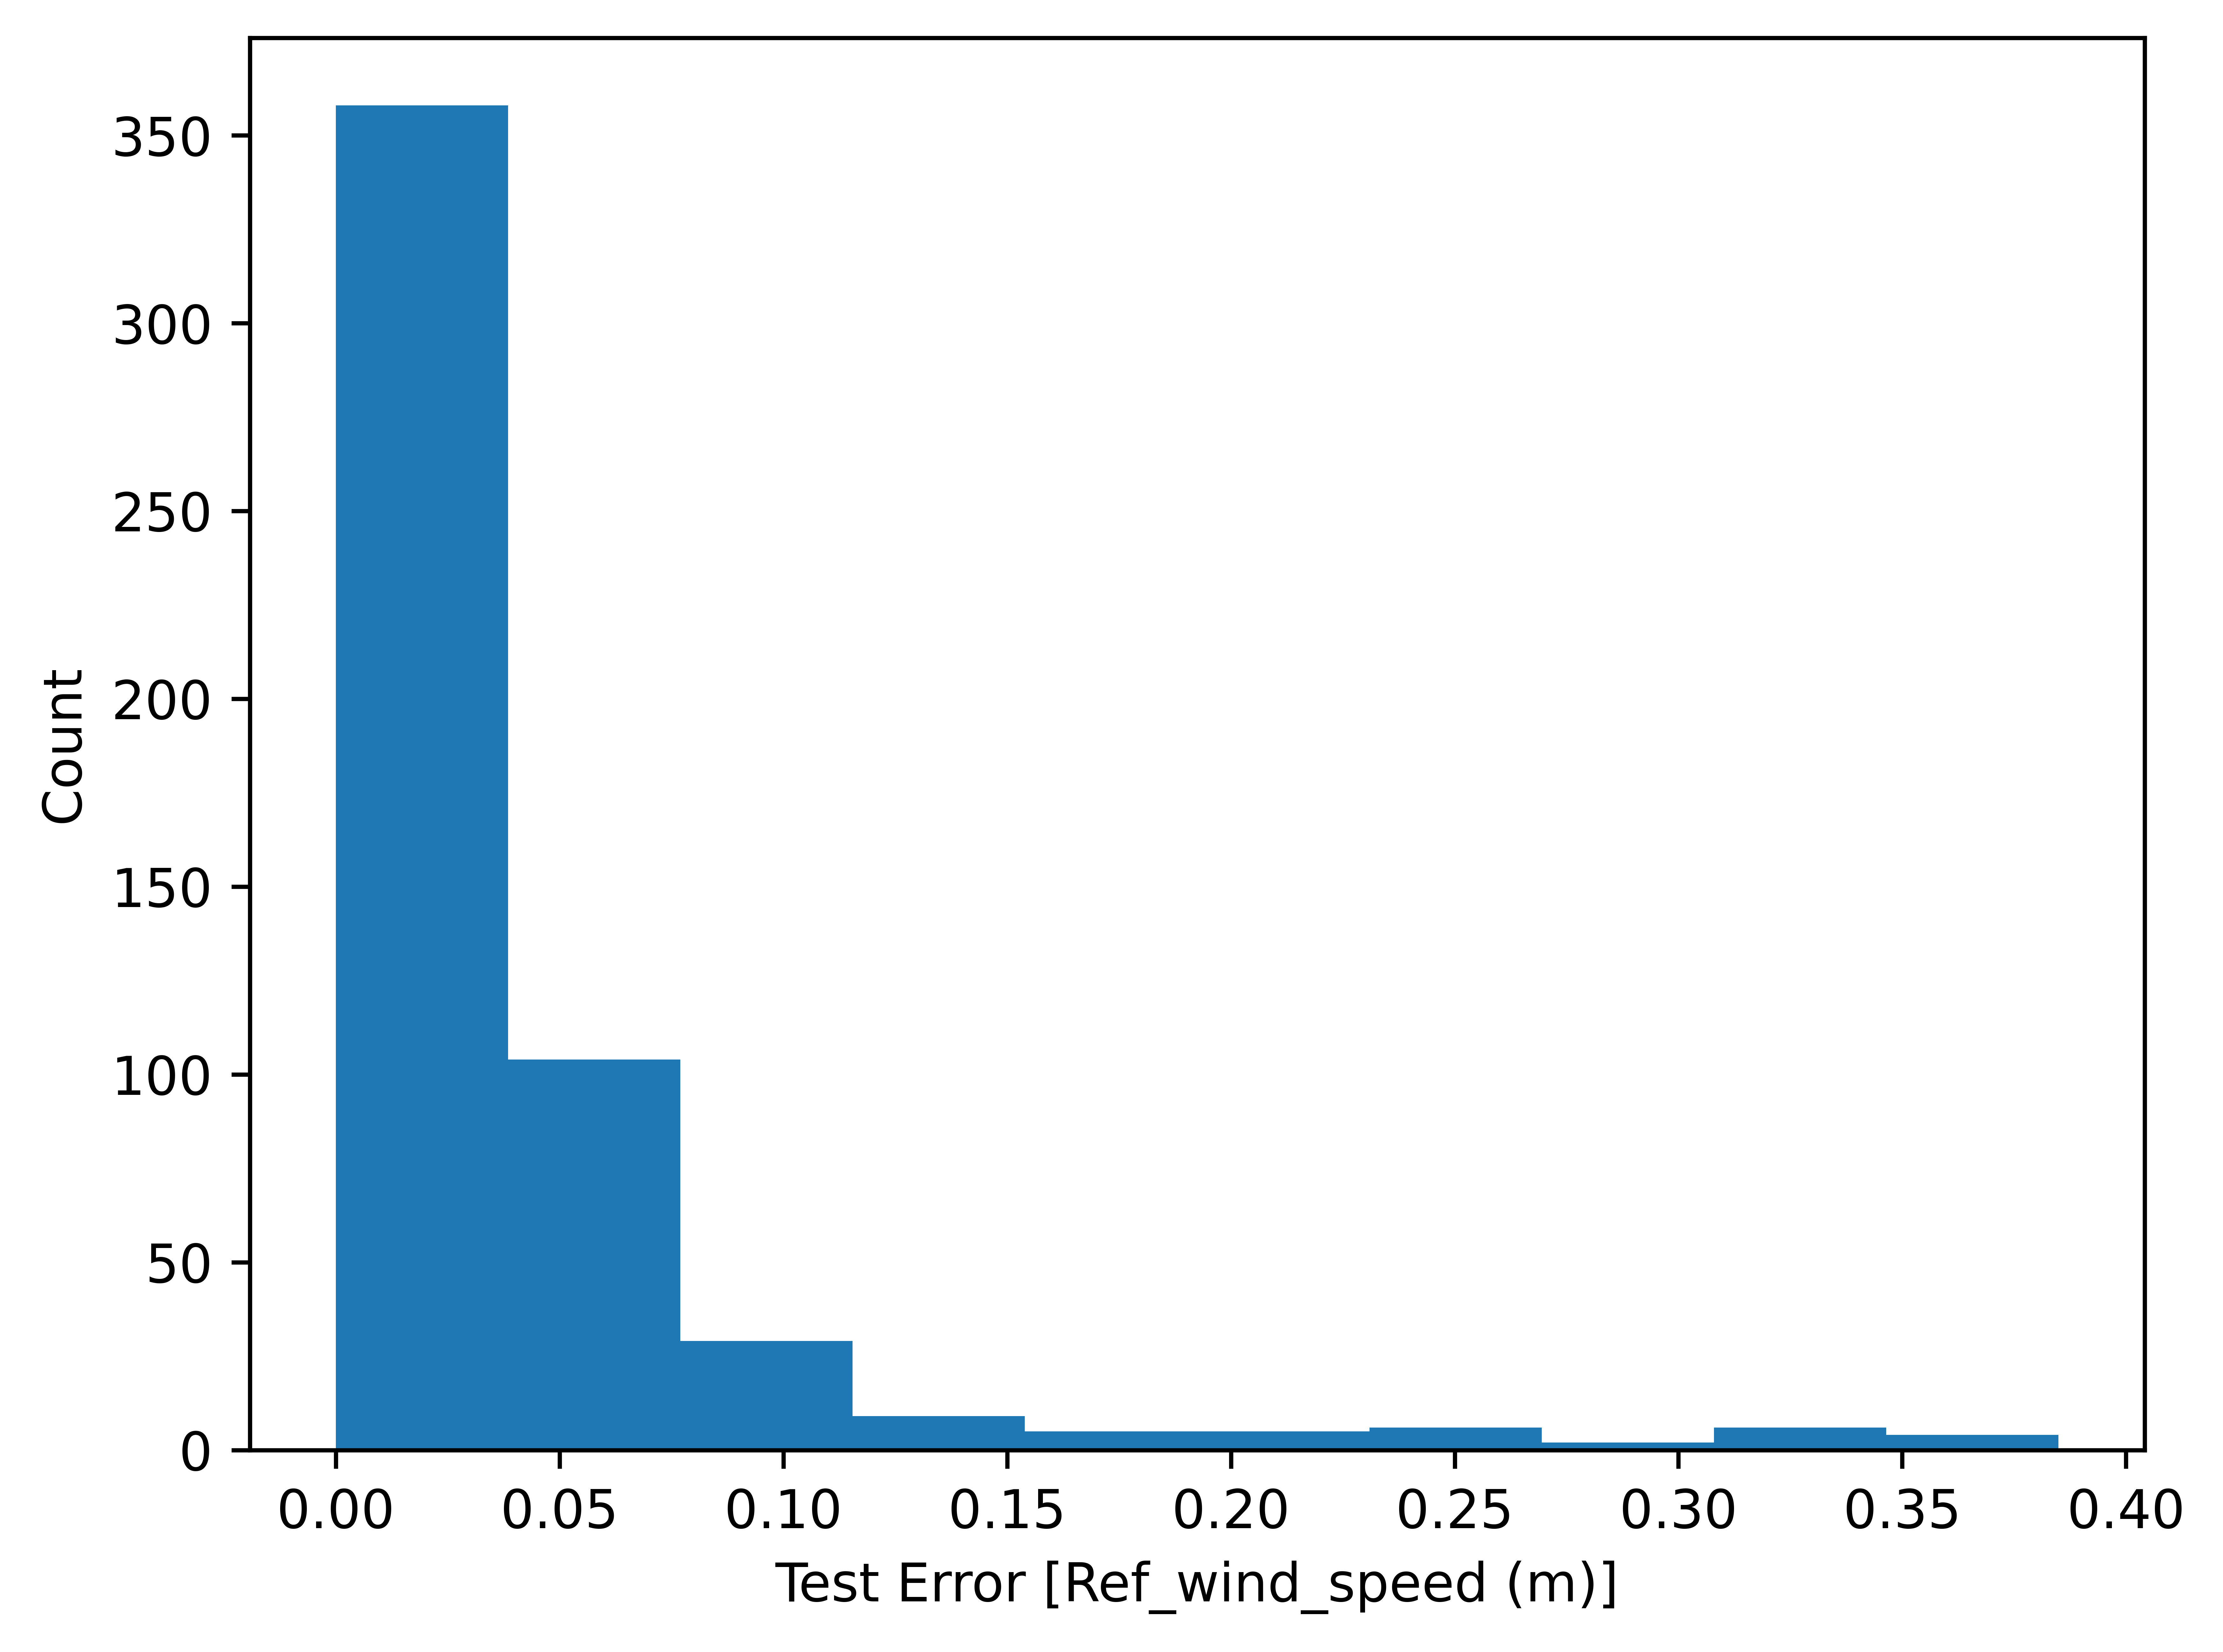

In [40]:
plt.figure(dpi=1200)
error_test = np.abs(test_predictions - Y_test)
plt.hist(error_test, bins=10)
plt.xlabel('Test Error [Ref_wind_speed (m)]')
_ = plt.ylabel('Count')

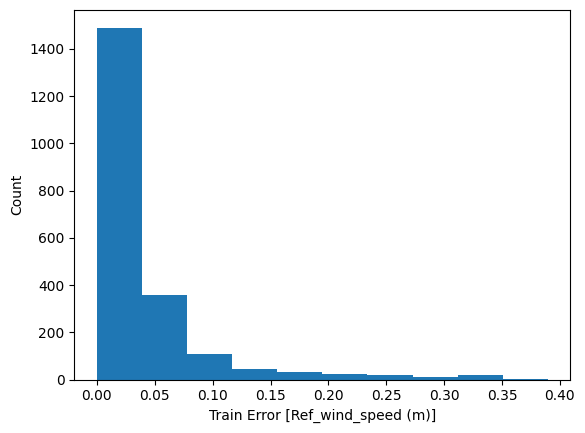

In [31]:
error_train = np.abs(train_predictions - Y_train)
plt.hist(error_train, bins=10)
plt.xlabel('Train Error [Ref_wind_speed (m)]')
_ = plt.ylabel('Count')

In [32]:
print("Max test error:",np.max(error_test))
print("Mean test error:",np.mean(error_test))

Max test error: 0.3848943689318851
Mean test error: 0.04219653670973112


In [33]:
print("Max all error:",np.max(error_all))
print("Mean all error:",np.mean(error_all))

Max all error: 0.3896546324206547
Mean all error: 0.04078995977926959


In [34]:
print("Max train error:",np.max(error_train))
print("Mean train error:",np.mean(error_train))

Max train error: 0.3896546324206547
Mean train error: 0.040438315546654204


In [35]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


INFO:tensorflow:Assets written to: dnn_model/assets


In [36]:
import matplotlib.cm as cm
plt.scatter(dataset['Fingerprint(G4)'],dataset['Fingerprint(G2)'], c=dataset['Ref_Wind_Speed'], s=10, cmap=cm.bwr)
cbar= plt.colorbar()
plt.xlabel('Fingerprint(G4)')
plt.ylabel('Fingerprint(G2)')
plt.show()

KeyError: 'Fingerprint(G4)'

In [ ]:
# dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
# import numpy
# from mayavi.mlab import *

# def test_points3d():


#     x = all_features["Fingerprint(G2)"]
#     y = all_features["Fingerprint(G4)"]
#     z = all_features["Fingerprint(G6)"]
#     s = error_all
#     colorbar(orientation='vertical')
#     xlabel('Fingerprint(G2)')
#     ylabel('Fingerprint(G4)')
#     zlabel('Fingerprint(G6)')
#     return points3d(x, y, z, s, colormap="blue-red", scale_factor=0.05)
# test_points3d()
# #colorbar(object=all_labels, title="Points in Mayavi")
# #view()
# show()